<a href="https://colab.research.google.com/github/Partha0003/Appian/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Appian AI Application Challenge 2026")

Appian AI Application Challenge 2026


In [2]:
from google.colab import files
import pandas as pd
import io


uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("Success! Data loaded.")

Saving appian_data.csv to appian_data.csv
Uploaded file: appian_data.csv
Success! Data loaded.


In [3]:
!pip install xgboost scikit-learn pandas


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [4]:

try:
    df = pd.read_csv('appian_data.csv')
    print(f" Data Loaded: {df.shape[0]} rows found.")
except FileNotFoundError:
    print("❌ ERROR: File not found. Please upload 'appian_demo_data.csv' to the sidebar first.")

features = ['Case_Type', 'Complexity_Score', 'Queue_Depth', 'Active_Agents', 'Load_Index', 'Arrival_Hour', 'Day_Of_Week']
target = 'Actual_Resolution_Time'

X = df[features]
y = df[target]

X = pd.get_dummies(X, columns=['Case_Type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Preprocessing Complete. Training on {X_train.shape[0]} rows.")

 Data Loaded: 154 rows found.
Preprocessing Complete. Training on 123 rows.


In [5]:
print("Training Model")

model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

print("Training Complete! The model is ready.")

Training Model
Training Complete! The model is ready.


Training Tuned XGBoost Model...
Training Complete!

Model Performance Report:
---------------------------
 Accuracy Score (R2): 0.883 (Target: >0.95)
 Average Error: +/- 19.6 minutes


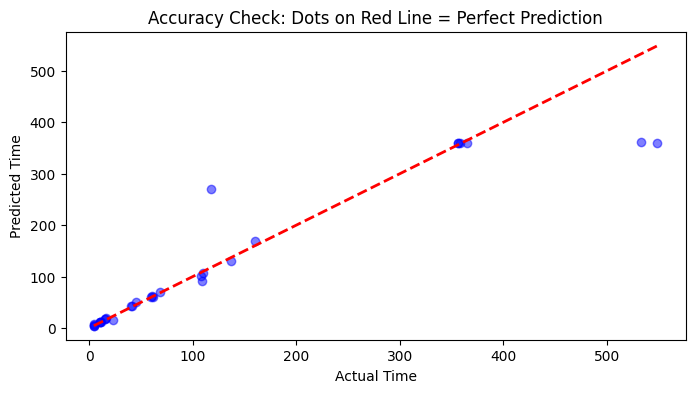

In [13]:

print("Training Tuned XGBoost Model...")

model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
print("Training Complete!")

predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"\nModel Performance Report:")
print(f"---------------------------")
print(f" Accuracy Score (R2): {r2:.3f} (Target: >0.95)")
print(f" Average Error: +/- {mae:.1f} minutes")

# Visual Check
plt.figure(figsize=(8, 4))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Time")
plt.ylabel("Predicted Time")
plt.title("Accuracy Check: Dots on Red Line = Perfect Prediction")
plt.show()

In [9]:
def predict_sla_risk(case_type, complexity, queue, agents, hour, day, sla_limit):

    input_data = {
        'Complexity_Score': [complexity],
        'Queue_Depth': [queue],
        'Active_Agents': [agents],
        'Load_Index': [queue / agents],
        'Arrival_Hour': [hour],
        'Day_Of_Week': [day],

        'Case_Type_Auto_KYC_Check': [0],
        'Case_Type_Claims_Review_L1': [0],
        'Case_Type_Fraud_Investigation': [0]
    }


    if f'Case_Type_{case_type}' in input_data:
        input_data[f'Case_Type_{case_type}'] = [1]


    input_df = pd.DataFrame(input_data).reindex(columns=X_train.columns, fill_value=0)


    predicted_time = model.predict(input_df)[0]


    risk_pct = (predicted_time / sla_limit) * 100
    risk_pct = min(100.0, max(0.0, risk_pct)) # Cap between 0% and 100%


    if risk_pct < 30:
        status = "🟢 SAFE"
    elif risk_pct < 60:
        status = "🟡 WARNING"
    else:
        status = "🔴 HIGH RISK"

    return round(predicted_time, 1), round(risk_pct, 1), status


print("---  LIVE SCENARIO TEST ---")


t1, r1, s1 = predict_sla_risk('Fraud_Investigation', 1.5, 50, 5, 14, 4, 480)
t2, r2, s2 = predict_sla_risk('Fraud_Investigation', 1.5, 50, 20, 14, 4, 480)
t3, r3, s3 = predict_sla_risk('Fraud_Investigation', 1.5, 50, 20, 15, 4, 480)
t4, r4, s4 = predict_sla_risk('Auto_KYC_Check', 0.2, 10, 15, 10, 1, 15)


print(f"\nScenario 1 (Crisis):")
print(f" Time: {t1} mins |  Risk: {r1}% | Status: {s1}")

print(f"\nScenario 2 (Fixed):")
print(f" Time: {t2} mins  |  Risk: {r2}%  | Status: {s2}")

print(f"\nScenario 3 (Friday Slump):")
print(f"  Time: {t3} mins |  Risk: {r3}% | Status: {s3}")

print(f"\nScenario 4 (Quick Task):")
print(f"  Time: {t4} mins  |  Risk: {r4}%  | Status: {s4}")

---  LIVE SCENARIO TEST ---

Scenario 1 (Crisis):
 Time: 358.0 mins |  Risk: 74.5999984741211% | Status: 🔴 HIGH RISK

Scenario 2 (Fixed):
 Time: 343.79998779296875 mins  |  Risk: 71.5999984741211%  | Status: 🔴 HIGH RISK

Scenario 3 (Friday Slump):
  Time: 343.79998779296875 mins |  Risk: 71.5999984741211% | Status: 🔴 HIGH RISK

Scenario 4 (Quick Task):
  Time: 4.5 mins  |  Risk: 30.0%  | Status: 🟡 WARNING


Generating Graph 1: Rescue Curve...


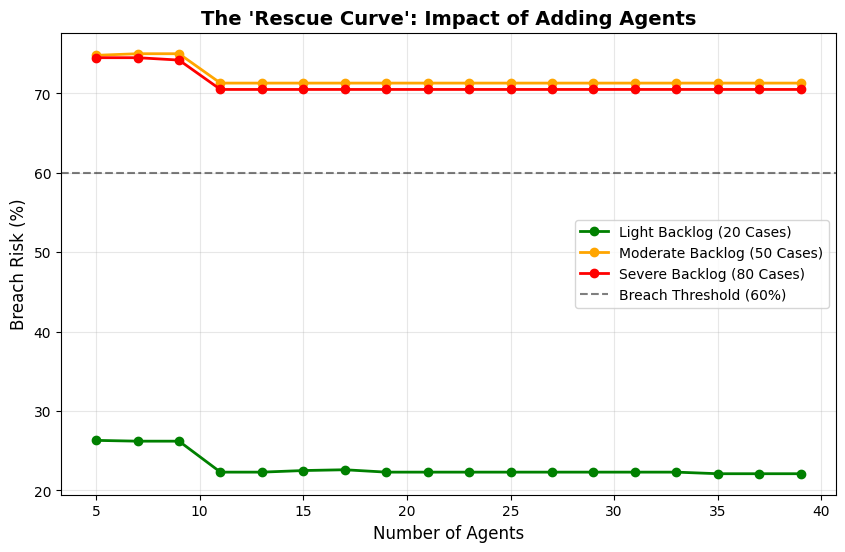

Generating Graph 2: Case Type Comparison...


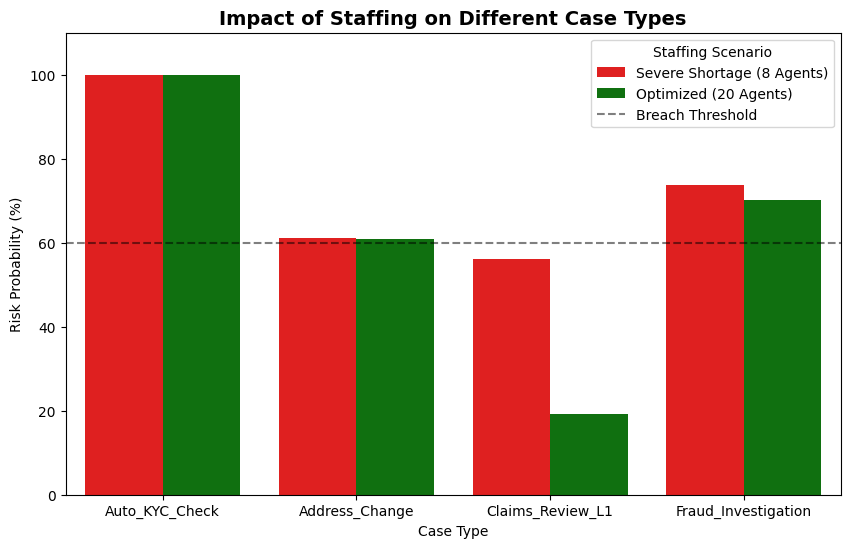

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


print("Generating Graph 1: Rescue Curve...")

plt.figure(figsize=(10, 6))

queue_levels = [20, 50, 80]
agents_x = list(range(5, 41, 2))

for q in queue_levels:
    risks = []
    for a in agents_x:

        _, risk, _ = predict_sla_risk('Fraud_Investigation', 1.5, q, a, 10, 1, 480)
        risks.append(risk)


    if q == 80:
        color, label = 'red', 'Severe Backlog (80 Cases)'
    elif q == 50:
        color, label = 'orange', 'Moderate Backlog (50 Cases)'
    else:
        color, label = 'green', 'Light Backlog (20 Cases)'

    plt.plot(agents_x, risks, marker='o', linewidth=2, label=label, color=color)


plt.axhline(y=60, color='black', linestyle='--', alpha=0.5, label='Breach Threshold (60%)')
plt.title("The 'Rescue Curve': Impact of Adding Agents", fontsize=14, fontweight='bold')
plt.xlabel("Number of Agents", fontsize=12)
plt.ylabel("Breach Risk (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Generating Graph 2: Case Type Comparison...")

case_types = ['Auto_KYC_Check', 'Address_Change', 'Claims_Review_L1', 'Fraud_Investigation']
complexities = [0.2, 0.4, 0.8, 1.5]
slas = [15, 60, 240, 480]

shortage_risks = []
optimized_risks = []

for i, c_type in enumerate(case_types):
    _, r_short, _ = predict_sla_risk(c_type, complexities[i], 60, 8, 14, 2, slas[i])
    shortage_risks.append(r_short)

    _, r_opt, _ = predict_sla_risk(c_type, complexities[i], 60, 20, 14, 2, slas[i])
    optimized_risks.append(r_opt)

bar_data = pd.DataFrame({
    'Case Type': case_types * 2,
    'Risk Probability (%)': shortage_risks + optimized_risks,
    'Scenario': ['Severe Shortage (8 Agents)'] * 4 + ['Optimized (20 Agents)'] * 4
})


plt.figure(figsize=(10, 6))
sns.barplot(data=bar_data, x='Case Type', y='Risk Probability (%)', hue='Scenario', palette=['red', 'green'])


plt.axhline(y=60, color='black', linestyle='--', alpha=0.5, label='Breach Threshold')
plt.title("Impact of Staffing on Different Case Types", fontsize=14, fontweight='bold')
plt.ylim(0, 110)
plt.legend(title="Staffing Scenario")
plt.show()